# Clase27: Deep Learning cn TensorFlow

### Diferencia entre TensorFlow y Keras

Por ejemplo en este caso: [link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2,2&seed=0.32536&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

#### TensorFlow Puro

En TensorFlow sin Keras, tendrías que manejar más detalles de bajo nivel como la creación de variables, la construcción del gráfico computacional, y el manejo de sesiones para ejecutar los cálculos. Aquí un ejemplo de cómo podría ser:



```python
import tensorflow as tf
import numpy as np

# Definir los datos de entrada y las etiquetas
X = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 2])

# Definir pesos y sesgos manualmente para cada capa
def dense_layer(X, input_size, output_size, activation=None):
    W = tf.Variable(tf.random_normal([input_size, output_size]), name="weights")
    b = tf.Variable(tf.zeros([output_size]), name="bias")
    z = tf.add(tf.matmul(X, W), b)
    if activation:
        z = activation(z)
    return z

# Crear la red neuronal con las capas ocultas
layer_1 = dense_layer(X, 2, 4, activation=tf.nn.tanh)  # Primera capa oculta
layer_2 = dense_layer(layer_1, 4, 2, activation=tf.nn.tanh)  # Segunda capa oculta
layer_3 = dense_layer(layer_2, 2, 2, activation=tf.nn.tanh)  # Tercera capa oculta
output = dense_layer(layer_3, 2, 2, activation=tf.nn.softmax)  # Capa de salida

# Definir el coste y el optimizador
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=output))
optimizer = tf.train.AdamOptimizer(learning_rate=0.03).minimize(loss)

# Inicializar variables y entrenar el modelo
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1000):
        # Alimentar los datos y entrenar aquí
        # sess.run(optimizer, feed_dict={X: batch_X, y: batch_y})
        pass


#### Keras

En Keras, todo este proceso se simplifica enormemente, ya que Keras maneja las capas y los detalles de la optimización por ti. El mismo modelo se puede definir y entrenar de forma mucho más intuitiva:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear el modelo secuencial
model = Sequential()

# Añadir capas ocultas
model.add(Dense(4, input_dim=2, activation='tanh'))  # Primera capa oculta
model.add(Dense(2, activation='tanh'))  # Segunda capa oculta
model.add(Dense(2, activation='tanh'))  # Tercera capa oculta

# Capa de salida
model.add(Dense(2, activation='softmax'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.03), loss='categorical_crossentropy')

# Entrenar el modelo
# model.fit(X_train, y_train, epochs=1000, batch_size=10)



### Ejemplo de Regresión Lineal

En repo de TF [link](https://www.tensorflow.org/tutorials/keras/regression?hl=es-419)

### Logistic regression for binary classification with Core APIs
El [link](https://www.tensorflow.org/guide/core/logistic_regression_core)

## Regresión lineal con TensorFlow

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


In [2]:
# Obtener los datos
dataset_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Nombres de las columnas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
# Verificar datos faltantes
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [5]:
# Eliminar datos faltantes (seis en Horsepower)
dataset = dataset.dropna()
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [8]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [9]:
# Dividir el set entre entrenamiento y testeo
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

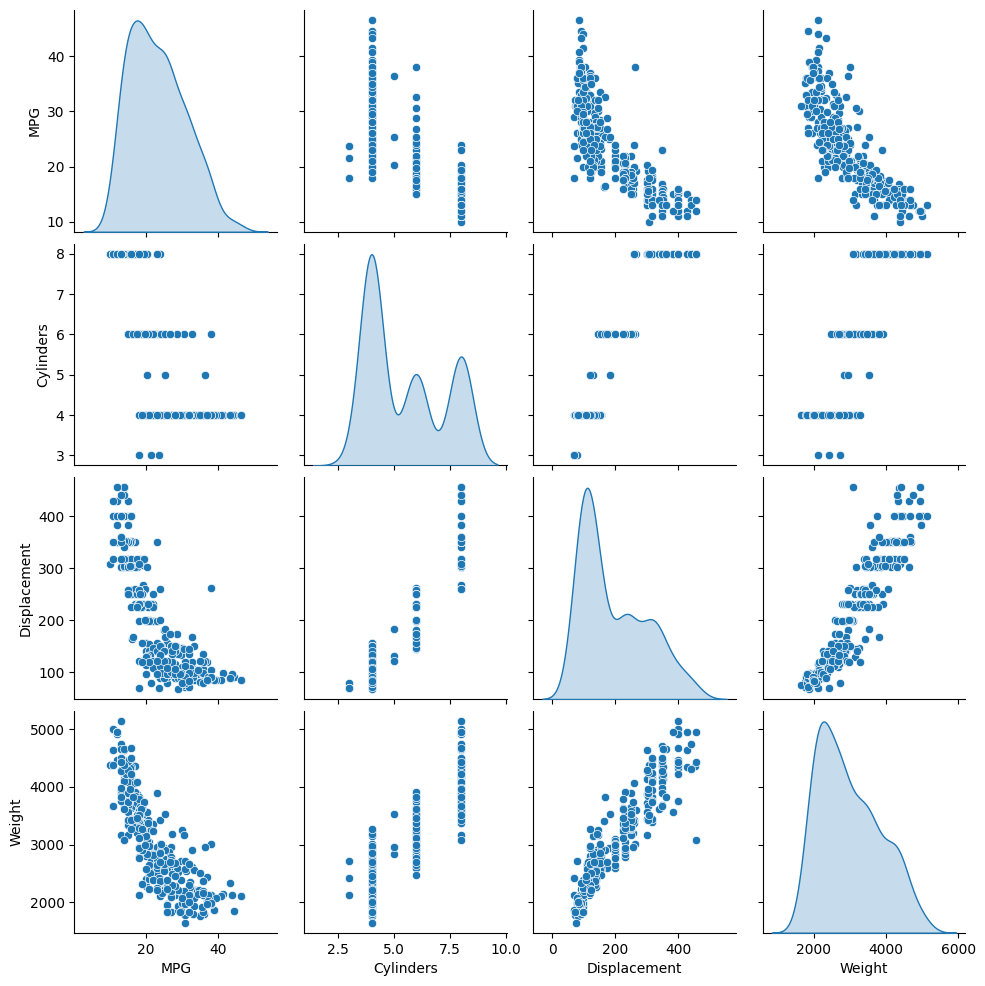

In [10]:
# Visualizar algunas métricas
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [11]:
# ver el describe de dataset
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [12]:
# Split target values, or "labels", in feature
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [13]:
# Normalizar los datos
def norm(x): # Definir una función de normalización
    return (x - train_stats['mean']) / train_stats['std']

# Aplicar la función de normalización a los sets de entrenamiento y testeo
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [14]:
# Make the sequential model with densely connected layer. The output layer returns the consecutive values.
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),layers.Dense(1)])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

model = build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[ 0.02861092],
       [ 0.3523303 ],
       [ 0.11609635],
       [ 0.44140726],
       [ 0.4291889 ],
       [ 0.01718418],
       [ 0.4417027 ],
       [-0.11066082],
       [-0.09071991],
       [ 0.12601385]], dtype=float32)

In [17]:
# Entrenar el modelo
# Put a period (.) to indicate the training process  at the end of each training epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(normed_train_data, train_labels,epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [18]:
# Visualize the performance of training process using the statistics in the history object
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.876441,1.093660,2.876441,8.479920,2.333041,8.479920,995
996,2.736147,1.101321,2.736147,8.666462,2.332908,8.666462,996
997,2.822089,1.110125,2.822089,8.650462,2.364247,8.650462,997
998,2.540562,1.091911,2.540562,8.440084,2.351074,8.440084,998
999,2.725573,1.086229,2.725573,8.614002,2.327854,8.614002,999


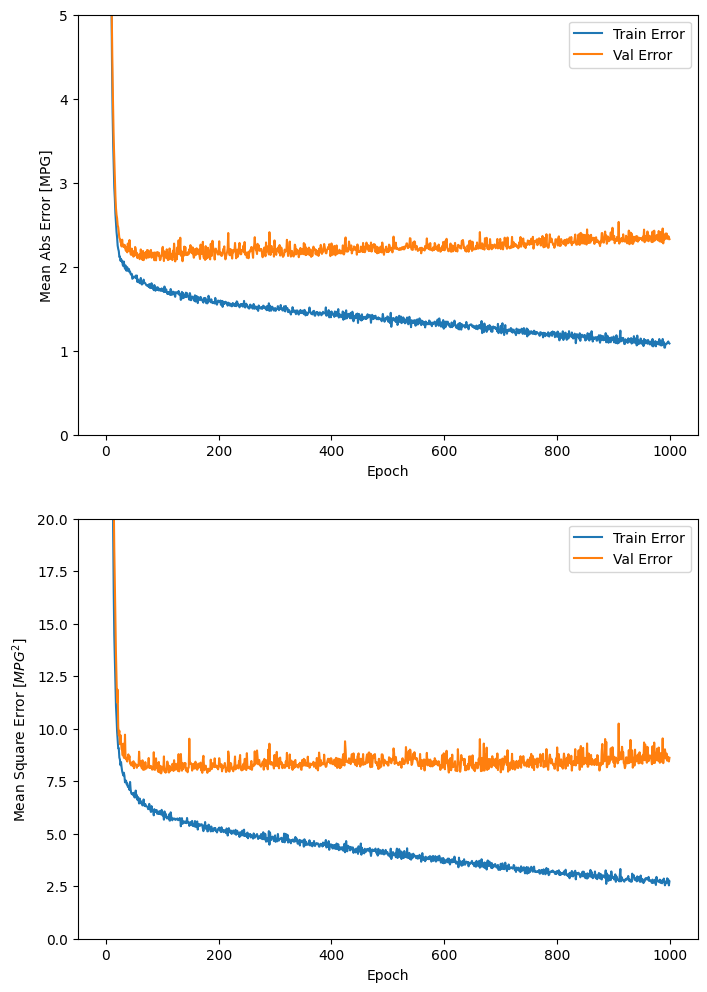

In [19]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



...................................................................................

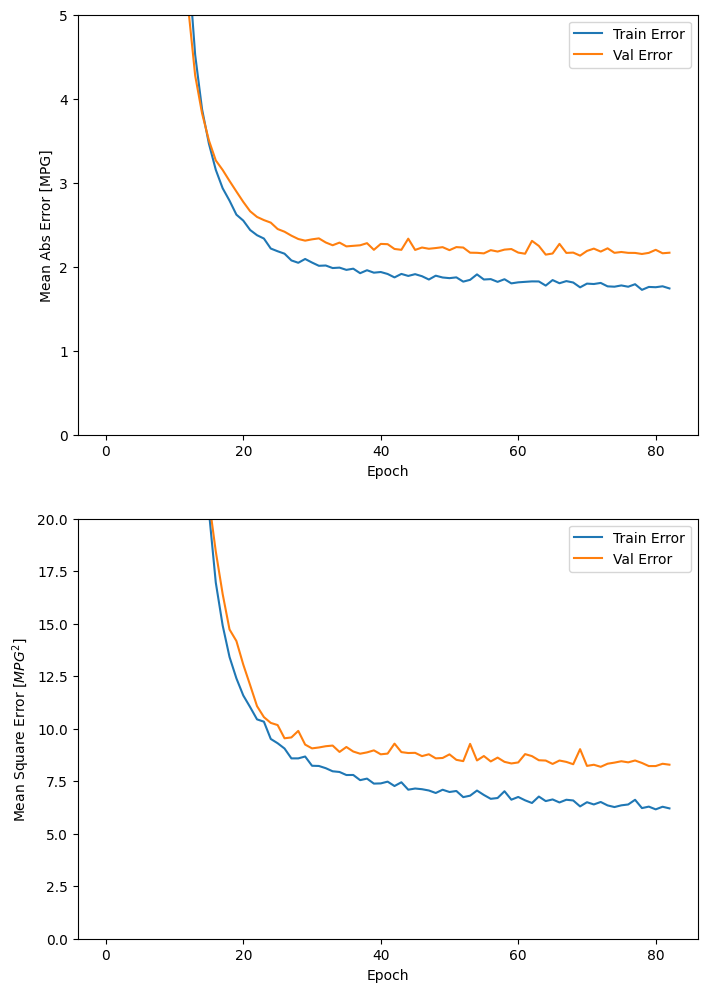

In [20]:
# By modifying the model.fit method, let trainig automatically stop when varification does not improve.
# Use EarlyStopping callback to check the training process at every epoch.
# Automatically stop training when there is no more improvement over the specified number of epochs.
model = build_model()

# The 'patience' parameter is the epoch number to be used for checkking improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [21]:
# Check the performance of model training set

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Mean absolute error of test set: {:5.2f} MPG".format(mae))

3/3 - 0s - 90ms/step - loss: 5.9717 - mae: 1.9120 - mse: 5.9717
Mean absolute error of test set:  1.91 MPG


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


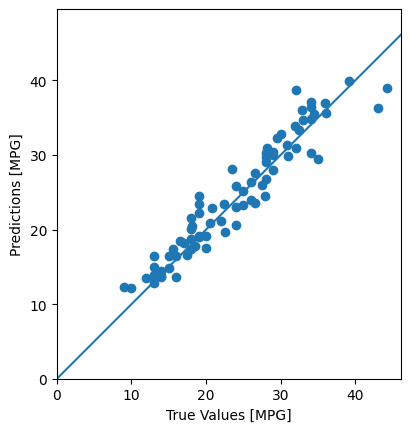

In [22]:
# Predicciones
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Softmax regression


In [24]:
import numpy as np

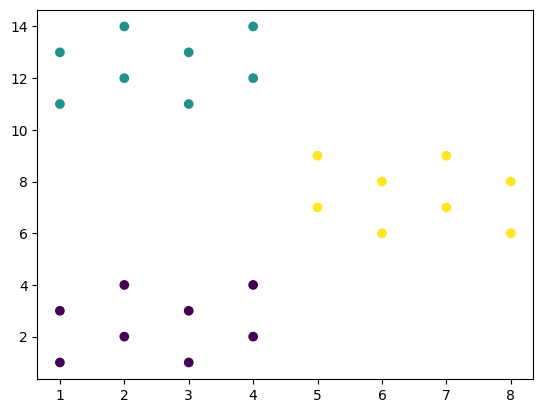

In [9]:
train_x = [[1,1],[1,3],[2,2],[2,4],[3,1],[3,3],[4,2],[4,4],
           [1,11],[1,13],[2,12],[2,14],[3,11],[3,13],[4,12],[4,14],
           [5,7],[5,9],[6,6],[6,8],[7,7],[7,9],[8,6],[8,8]]
train_y = [[0],[0],[0],[0],[0],[0],[0],[0],
           [1],[1],[1],[1],[1],[1],[1],[1],
           [2],[2],[2],[2],[2],[2],[2],[2]]

train_x = np.array(train_x, dtype=np.float32)
train_y = np.array(train_y, dtype=np.float32)

plt.scatter(train_x[:,0:1], train_x[:,1:2], c=train_y)
plt.show()

In [10]:
# One-hot Encoding for Label
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y)

In [11]:
# Create the model class
class softmaxWithTF():
    def __init__(self):
        self.epochs = 1000
        self.learning_rate = 0.015
        self.w = tf.Variable(tf.random.normal(shape=[2,3], dtype=tf.float64))
        self.b = tf.Variable(tf.random.normal(shape=[1,3], dtype=tf.float64))

    def train_on_batch(self, x, y):
        with tf.GradientTape() as tape:
            logit = tf.matmul(x, self.w) + self.b
            hypothesis = tf.nn.softmax(logit)
            loss = -tf.reduce_mean(tf.reduce_sum(y*tf.math.log(hypothesis), 1))

        loss_dw, loss_db = tape.gradient(loss, [self.w, self.b])

        self.w.assign_sub(self.learning_rate * loss_dw)
        self.b.assign_sub(self.learning_rate * loss_db)

        return loss

    def fitModel(self, x, y):
        dataset = tf.data.Dataset.from_tensor_slices((x,y))
        dataset = dataset.shuffle(buffer_size=24).batch(8)

        loss_mem = []

        for e in range(self.epochs):
            for step, (x,y) in enumerate(dataset):
                loss = self.train_on_batch(x,y)
            loss_mem.append(loss)
        return loss_mem

    def predictModel(self, x):
        logit = tf.matmul(x, self.w) + self.b
        hypothesis = tf.nn.softmax(logit)
        return tf.argmax(hypothesis, 1)

In [12]:
# convertir train_x en un tensor de 64
train_x = tf.convert_to_tensor(train_x, dtype=tf.float64)
train_y = tf.convert_to_tensor(train_y, dtype=tf.float64)

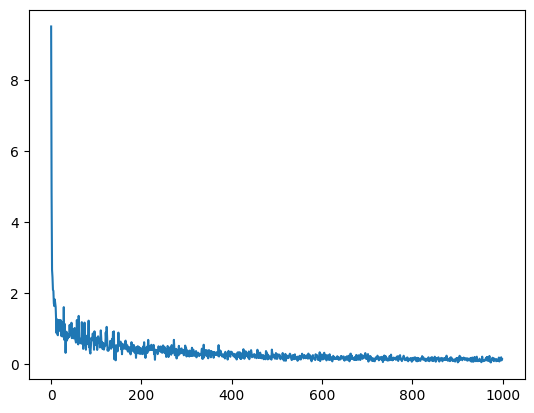

In [13]:
# fit del modelo
model = softmaxWithTF()
loss_mem = model.fitModel(train_x, train_y)

epochs_x = list(range(len(loss_mem)))
plt.plot(epochs_x, loss_mem)
plt.show()

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


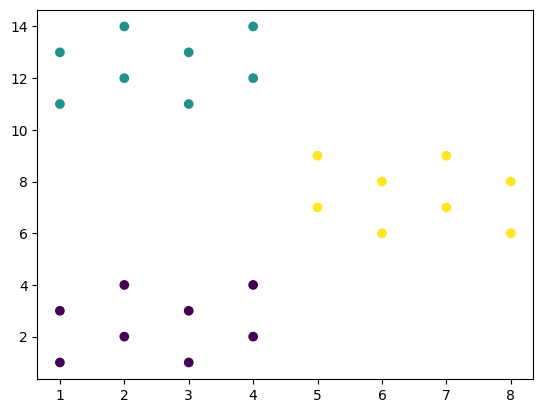

In [14]:
# Predicción del modelo
res_y = model.predictModel(train_x)

print(res_y.numpy())

res_y = np.expand_dims(res_y.numpy(), axis=1)

plt.scatter(train_x[:,0:1], train_x[:,1:2], c=res_y)
plt.show()

# Ejercicio: Detección de Malaria usando TensorFlow y Keras
Este ejercicio consiste en entrenar un modelo de clasificación de imágenes para detectar células infectadas con malaria.

### Paso 1: Importar las librerías necesarias
Primero, debemos importar las librerías requeridas.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Paso 2: Cargar el dataset de malaria
Usaremos tensorflow_datasets para cargar el conjunto de datos de malaria. Vamos a dividir el conjunto de datos en entrenamiento y validación.

In [ ]:
# Cargar el dataset de malaria
(train_dataset, test_dataset), info = tfds.load('malaria',
                                                split=['train[:80%]', 'train[80%:]'],
                                                as_supervised=True,
                                                with_info=True)

# Información básica sobre el dataset
print(info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

### Paso 3: Preprocesar los datos
Es importante normalizar las imágenes, ya que los modelos de redes neuronales se entrenan mejor con valores entre 0 y 1. Normalizaremos las imágenes dividiendo los valores de los píxeles por 255.0.

In [ ]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalización
    return image, label

# Aplicar la preprocesamiento a los datos
train_dataset = train_dataset.map(preprocess).batch(32).shuffle(buffer_size=1000)
test_dataset = test_dataset.map(preprocess).batch(32)

### Paso 4: Crear el modelo de red neuronal convolucional (CNN)
Usaremos una red neuronal convolucional simple con algunas capas de convolución y pooling, seguida de capas densas para la clasificación.

In [ ]:
# Crear un modelo secuencial
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(145, 145, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Para reducir sobreajuste

    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 143, 143, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 71, 71, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 69, 69, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,287,809 (16.36 MB)

 Trainable params: 4,287,809 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

### Paso 5: Entrenar el modelo
Utilizaremos EarlyStopping para detener el entrenamiento si el modelo deja de mejorar en el conjunto de validación.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Función para preprocesar imágenes, incluyendo el redimensionamiento
def preprocess_image(image, label, img_size=(103, 103)):
    image = tf.image.resize(image, img_size)  # Redimensionar a 103x103
    image = image / 255.0  # Normalizar entre 0 y 1
    return image, label

# Aplica esta función al cargar tu dataset
train_dataset = train_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

# Crear el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(103, 103, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset)


### Paso 6: Evaluar el modelo
Después del entrenamiento, evaluamos el rendimiento del modelo en el conjunto de datos de prueba.

In [ ]:
# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


### Paso 7: Visualización de resultados
Es útil visualizar las curvas de pérdida y precisión durante el entrenamiento.



In [ ]:
# Visualizar los resultados
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

### Paso 8: Hacer predicciones
Finalmente, puedes usar el modelo para hacer predicciones en nuevas imágenes o en algunas del conjunto de prueba.


In [ ]:
# Obtener algunas imágenes del conjunto de test para predecir
for image, label in test_dataset.take(1):
    pred = model.predict(image)
    print("Predicción:", pred)
    print("Etiqueta real:", label.numpy())


## AI with Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense